In [9]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import cv2
from mpl_toolkits.axes_grid1 import ImageGrid

def show_img(img, title=None, dpi=150):
    fig, ax = plt.subplots(nrows=1, ncols=1, dpi=dpi)
    fig.subplots_adjust(left=0, right=1, top=1, bottom=0) # 余白を取り除く
    if title:
        ax.set_title(title, fontsize=16, color='black')
    ax.axes.xaxis.set_visible(False) # X軸を非表示に
    ax.axes.yaxis.set_visible(False) # Y軸を非表示に
    ax.imshow(img)
    plt.show(); plt.close()
    return None

def show_imgs(imgs_dict:dict, ncol=0, dpi=200, font_scale=0.3, max_text_size=30, put_title=True):
    font_size = int(plt.rcParams["font.size"]*font_scale)

    if ncol > 0:
        nrow = ((len(imgs_dict)-1)//ncol)+1
    else:
        nrow = 1
        ncol = len(imgs_dict)

    img_num = len(imgs_dict)
    fig = plt.figure(figsize=(float(img_num), float(img_num)), dpi=dpi)
    grid = ImageGrid(fig, 111, nrows_ncols=(nrow, ncol), axes_pad=0.2,)

    for i in range(nrow*ncol):
        grid[i].axis('off')
        if i < len(imgs_dict):
            img_key = list(imgs_dict.keys())[i]
            grid[i].imshow(imgs_dict[img_key])
            
            # img_keyの文字列がmax_text_sizeを超える場合は、改行する
            # ただし、文字列内に"\n"が含まれている場合は、改行しない
            if len(str(img_key)) > max_text_size:
                if "\n" not in str(img_key):
                    img_key = "\n".join([img_key[i:i+max_text_size] for i in range(0, len(img_key), max_text_size)])
            
            if put_title:
                grid[i].set_title(img_key, fontsize=font_size, color='black', pad=int(font_size/2))
    
    plt.show(); plt.close()
    return None

def show_imgs2(imgs_dict:dict, ncol=0, dpi=200, font_scale=0.7):
    titles = list(imgs_dict.keys())
    fig, ax = plt.subplots(nrows=1, ncols=len(titles), dpi=1000)

    for i in range(len(titles)):
        ax[i].set_title( titles[i], fontsize=3, color='black')
        ax[i].axes.xaxis.set_visible(False) # X軸を非表示に
        ax[i].axes.yaxis.set_visible(False) # Y軸を非表示に
        ax[i].imshow(cv2.cvtColor(imgs_dict[titles[i]], cv2.COLOR_BGR2RGB))
    
    fig.tight_layout()
    plt.show(); plt.close()
    return None

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


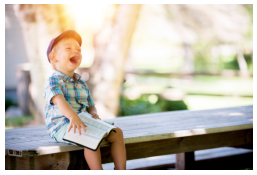

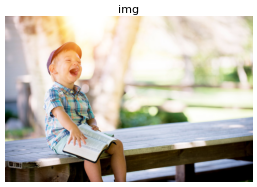

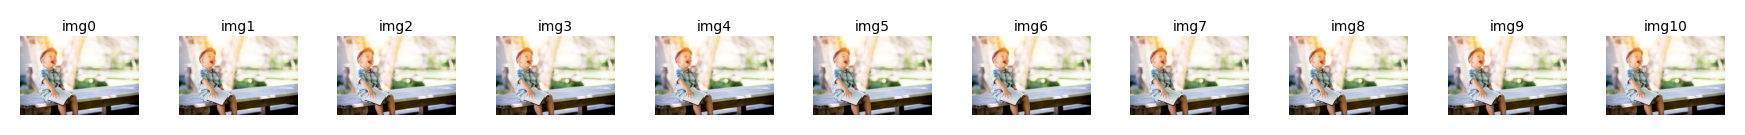

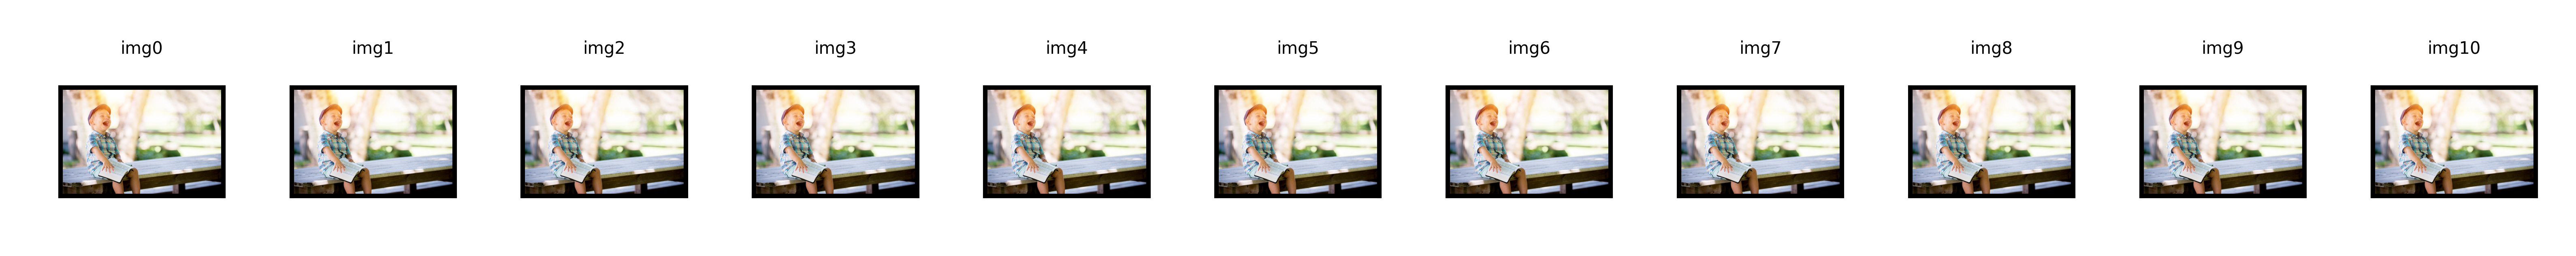

In [10]:
img_path = "../../sample_data/sample_jpg.jpg"

img = cv2.imread(img_path)
show_img(img, dpi=50)
show_img(img, title="img", dpi=50)

img_dict = {}
for i in range(11):
  img_dict[f"img{i}"] = img
  
show_imgs(img_dict)
show_imgs2(img_dict, ncol=5, dpi=100)
